In [31]:
using PyPlot
using Statistics
using LaTeXStrings

include("./useful_func.jl")
include("./linear_func.jl")

function cost(theta, x, y)
    sum((theta[1] .+ theta[2].*x .- y).^2) / (2*length(y))
end

cost (generic function with 1 method)

In [62]:
m = 10
x = [n for n in 0:9] .+ rand(m)*0.3
y = x .+ rand(length(x)) * 2
x = [ones(m) x]

theta = [-3.9; 1.5]
linear_grad(theta, x, y)
temp = ones(size(theta))
temp[:] = theta[:]
alpha = 0.001
num_steps = 10000
interval = 100
for step = 1:num_steps
    theta .-= alpha .* linear_grad(theta, x, y)
    if step % interval==0
        temp = hcat(temp, theta)
    end
end


In [69]:
theta

2-element Array{Float64,1}:
 0.751319265202143 
 1.0270146857270508

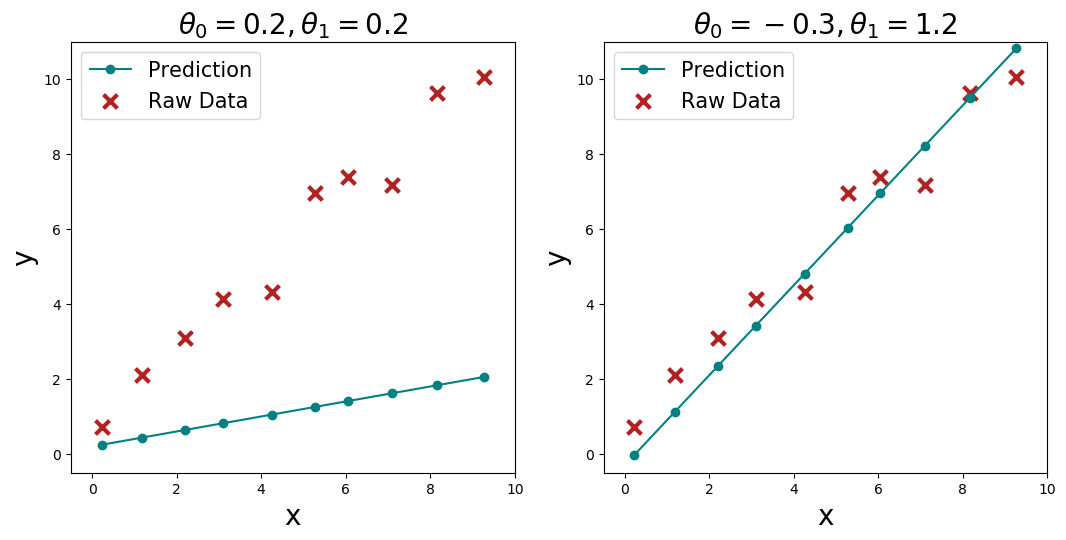

In [72]:
figure(figsize=[12.6, 5.6])

theta = [
    0.2 0.2
    -0.3 1.2
]
subplot(121)
scatter(x[:, 2], y, marker="x", label="Raw Data", c="firebrick", s=100, linewidth=3)
plot(x[:, 2], theta[1, 2] .* x[:, 2] .+ theta[1, 1], marker="o", c="teal", label="Prediction")
legend(loc="best", fontsize=15)
title(L"\theta_0 = 0.2, \theta_1=0.2", fontsize=20)
xlabel("x", fontsize=20)
ylabel("y", fontsize=20)
xlim(-0.5, 10)
ylim(-0.5, 11)


subplot(122)
scatter(x[:, 2], y, marker="x", label="Raw Data", c="firebrick", s=100, linewidth=3)
plot(x[:, 2], theta[2, 2] .* x[:, 2] .+ theta[2, 1], marker="o", c="teal", label="Prediction")
legend(loc="best", fontsize=15)
title(L"\theta_0 = -0.3, \theta_1=1.2", fontsize=20)
xlabel("x", fontsize=20)
ylabel("y", fontsize=20)
xlim(-0.5, 10)
ylim(-0.5, 11)

savefig("cost_func_data.svg", optimize=true, format="svg", transparent=true)

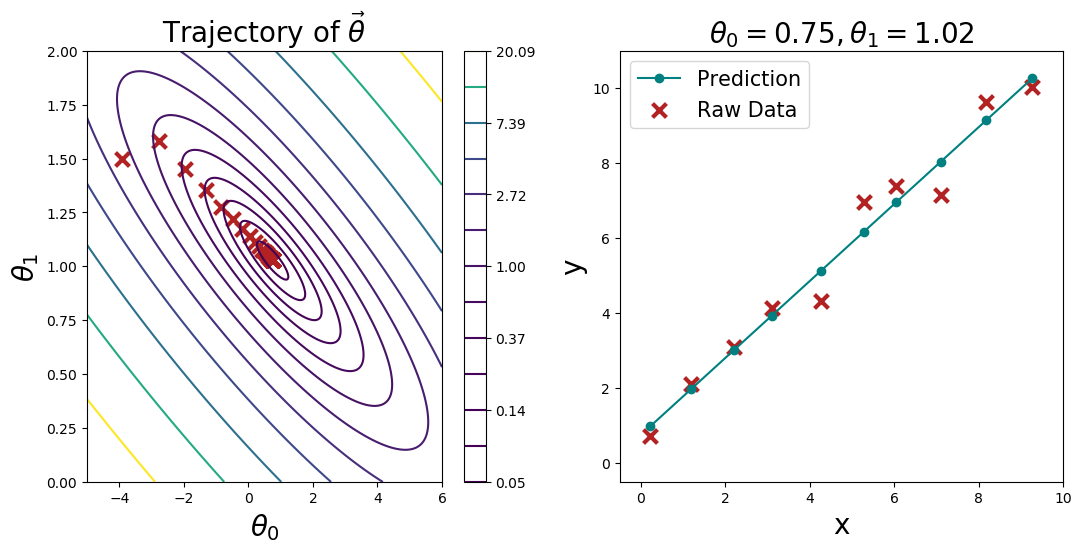

In [71]:
theta_0 = [n for n = -5:0.01:6]
theta_1 = [n for n = 0:0.01:2]
a, b = meshgrid(theta_0, theta_1)
data = [linear_cost([a[i, j]; b[i, j]], x, y) for i=1:length(theta_0), j = 1:length(theta_1)]

pos = minimum(data)
pos = findall(x->x==pos, data)

figure(figsize=[12.6, 5.6])
subplot(121)
contour(a,b,data, [exp(n) for n=-3:0.5:3])
colorbar(orientation="vertical")
scatter(temp[1, :], temp[2, :], c="firebrick", label="Points", marker="x", s=100, linewidth=3)
title(L"Trajectory of $\vec\theta$", fontsize=20)
xlabel(L"$\theta_0$", fontsize=20)
ylabel(L"$\theta_1$", fontsize=20)

subplot(122)
scatter(x[:, 2], y, marker="x", label="Raw Data", c="firebrick", s=100, linewidth=3)
plot(x[:, 2], linear_hypo(theta, x), marker="o", c="teal", label="Prediction")
legend(loc="best", fontsize=15)
title(L"\theta_0=0.75, \theta_1=1.02", fontsize=20)
xlabel("x", fontsize=20)
ylabel("y", fontsize=20)
xlim(-0.5, 10)
ylim(-0.5, 11)
savefig("cost_func_contour.svg", optimize=true, format="svg", transparent=true)

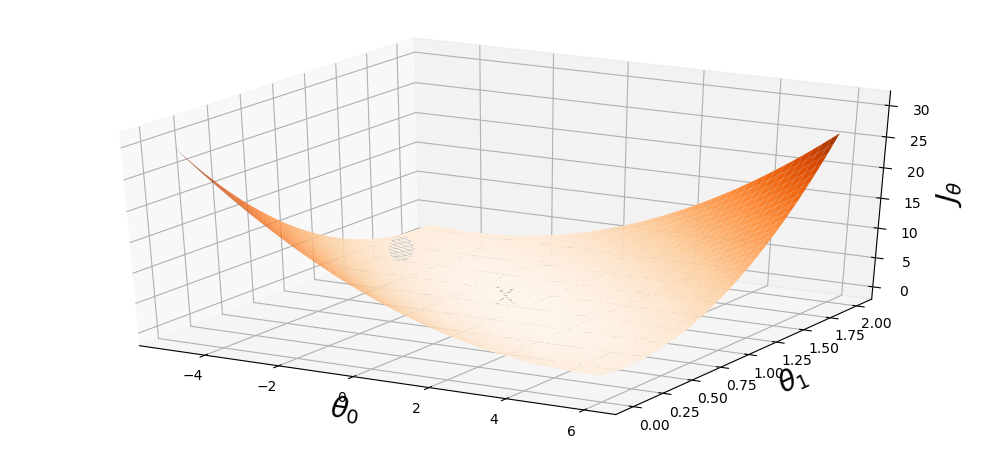

In [73]:
pygui(false)
figure(figsize=[12.6, 5.6])
surf(a, b, data, cmap="Oranges")

xlabel(L"\theta_0", fontsize=20)
ylabel(L"\theta_1", fontsize=20)
zlabel(L"J_{\theta}", fontsize=20)

scatter3D(theta[1, 1], theta[1, 2], linear_cost(theta[1, :], x, y)+10, s=300)
scatter3D(theta[2, 1], theta[2, 2], linear_cost(theta[2, :], x, y), c="black", marker="x", s=150)

#scatter3D(theta[1, 1], theta[1, 2], cost(theta[1, :], x, y), s=100)

savefig("cost_func_surf.svg", optimize=true, format="svg", transparent=true)

In [43]:
function cost(theta, x, y)
    sum((theta[1] .+ theta[2].*x .- y).^2) / (2*length(y))
end

cost (generic function with 1 method)

In [127]:
cost(theta[1, :], x, y)
cost(theta[2, :], x, y)

0.38540310477497364